In [1]:
import pandas as pd
import numpy as np
import json
import os

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"
df = pd.read_csv(os.path.join(path_original_data, 'dataset.csv'), low_memory=False)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
df.drop(df.columns[0], axis=1, inplace=True)
print(df.shape)
df.describe()

(114000, 20)


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

# DATA CLEANING
### Missing values

In [4]:
features_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>0]
features_with_nan

['artists', 'album_name', 'track_name']

In [5]:
for feature in features_with_nan: print('Number of missing value in {}: {}'.format(feature,np.round(df[feature].isna().sum())))
df=df.dropna()
df.isna().sum()

Number of missing value in artists: 1
Number of missing value in album_name: 1
Number of missing value in track_name: 1


track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Removing duplicates

In [6]:
df=df.drop_duplicates()
df.shape

(113549, 20)

# SELECTING FEATURES

In [7]:
feature_numerical=[feature for feature in df.columns if df[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
df[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


### Differienate between numerical features
Those that only have a few unique values are closer to categorial features.

In [8]:
feature_discrete_numerical=[feature for feature in feature_numerical if df[feature].nunique()<50]
print(feature_discrete_numerical)
features_continuous_numerical=[features for features in feature_numerical if features not in feature_discrete_numerical]
print(features_continuous_numerical)

['explicit', 'key', 'mode', 'time_signature']
['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


popularity skewness is : 0.04222809948109981


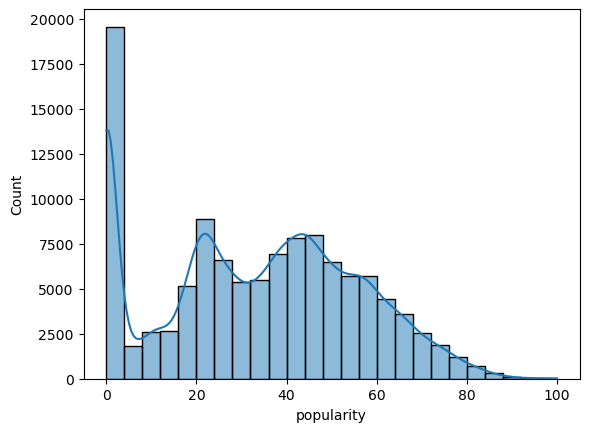

duration_ms skewness is : 10.814434004933338


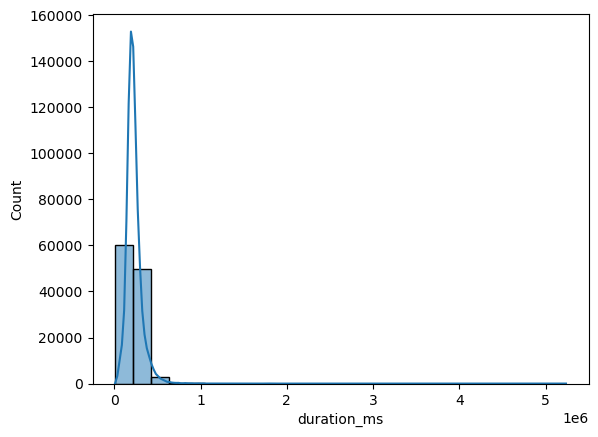

danceability skewness is : -0.4003991295600715


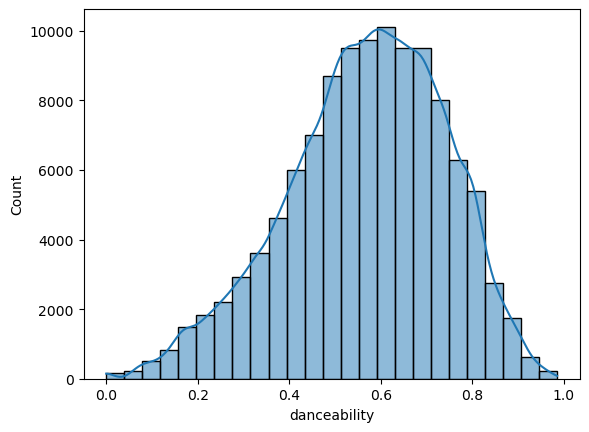

energy skewness is : -0.598542182428158


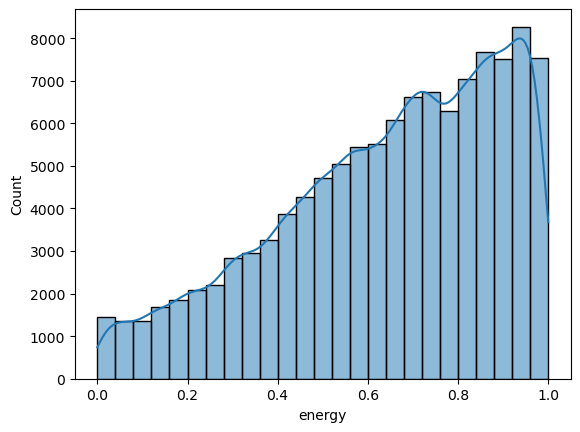

loudness skewness is : -2.0133133823721505


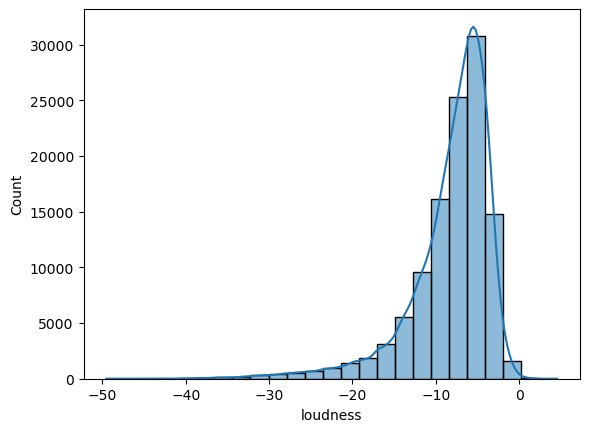

speechiness skewness is : 4.644508700286168


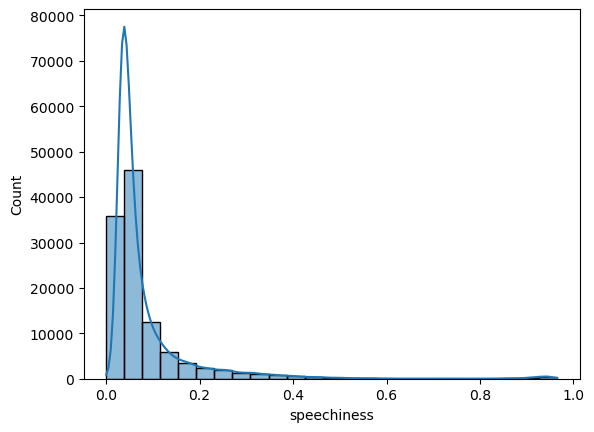

acousticness skewness is : 0.7302103030827026


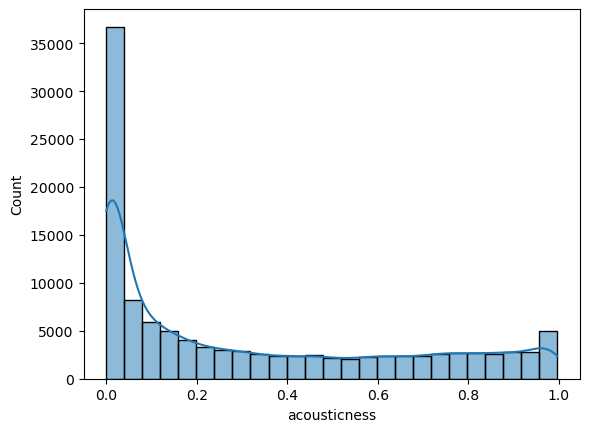

instrumentalness skewness is : 1.7377466866935405


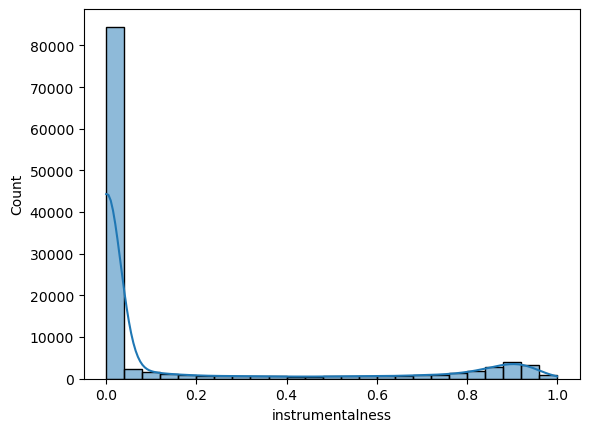

liveness skewness is : 2.1054497237799685


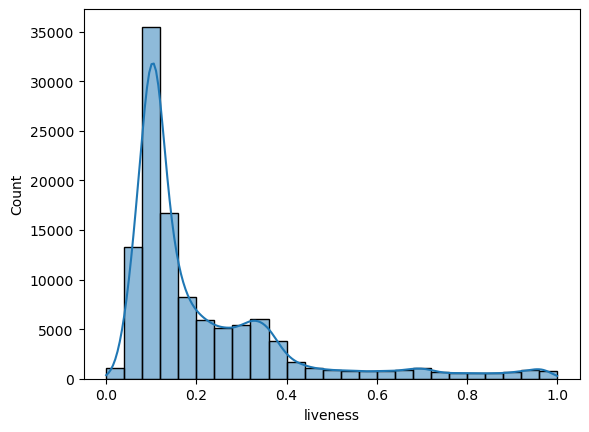

valence skewness is : 0.11477275798096229


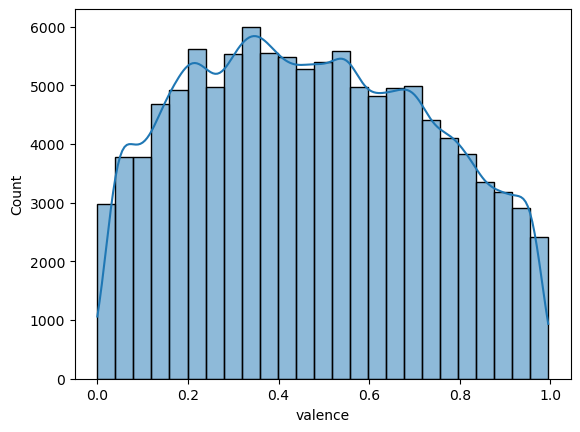

tempo skewness is : 0.23160111991386964


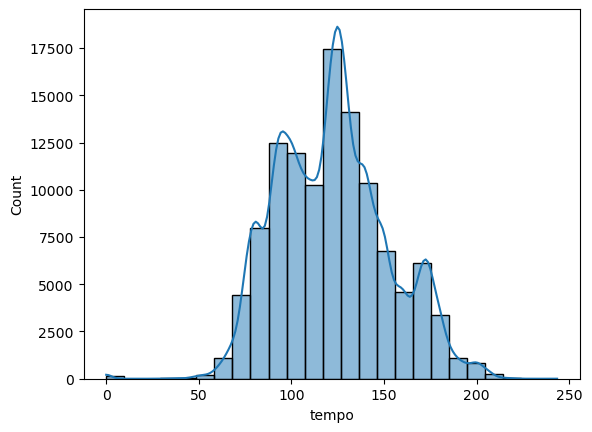

In [9]:
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features_continuous_numerical:
    dataset=df.copy()
    print(feature, 'skewness is :', skew(dataset[feature]))
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    plt.show()

Observation:

- Danceability, valence and tempo are almost normal distribution.
- Loudness is left skewed.
- Rest all are right skewed.

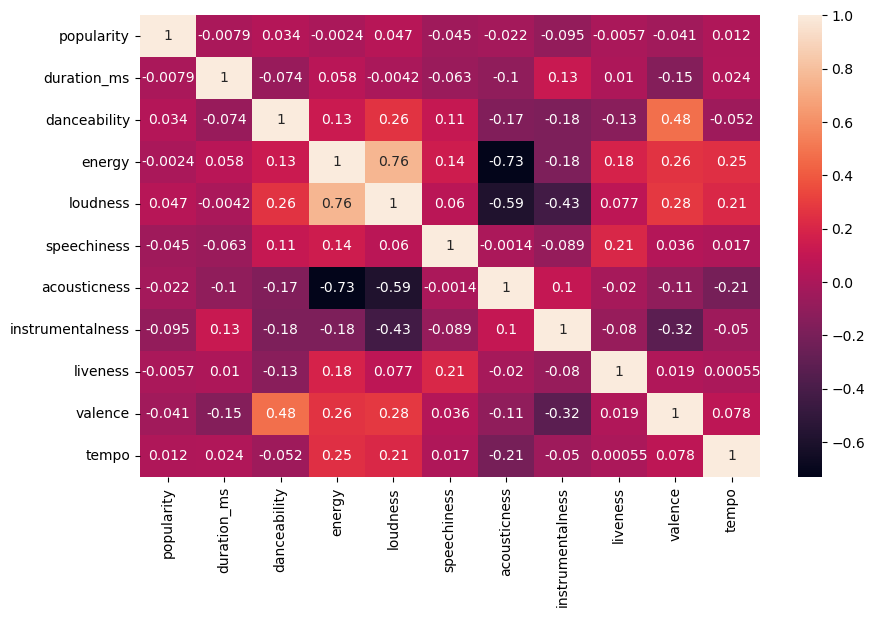

In [10]:
dataset=df.copy()
plt.figure(figsize=(10,6))
sns.heatmap(df[features_continuous_numerical].corr(), annot=True)
plt.show()

Observation:

- None of the continuous features has a great correlation with the target variable popularity.

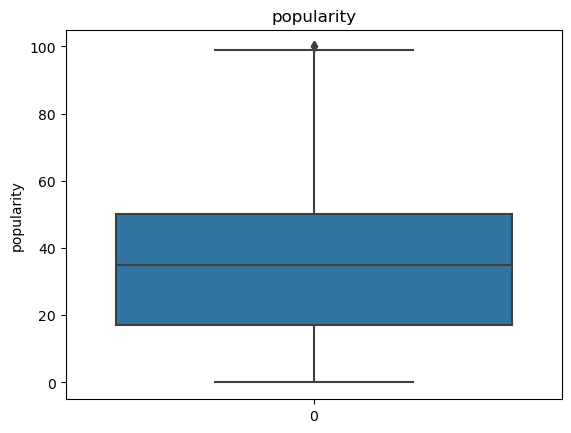

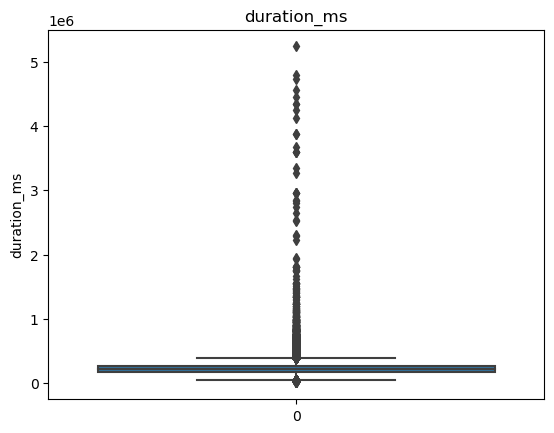

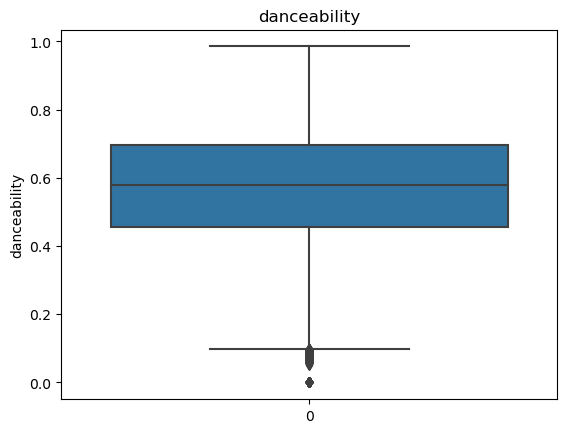

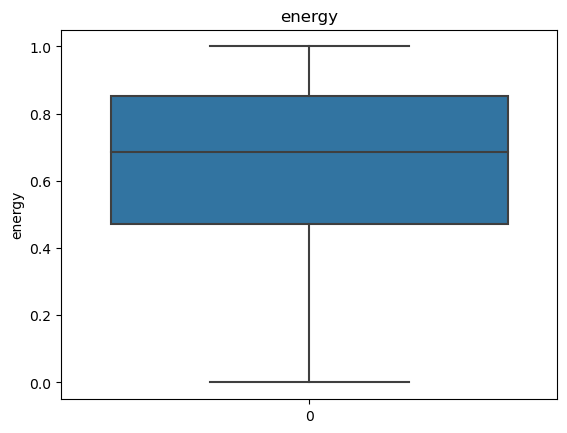

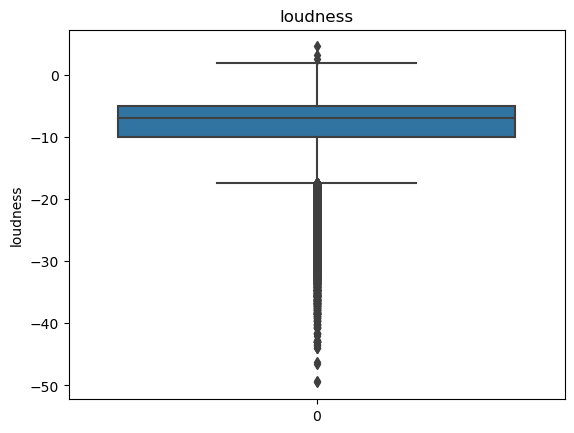

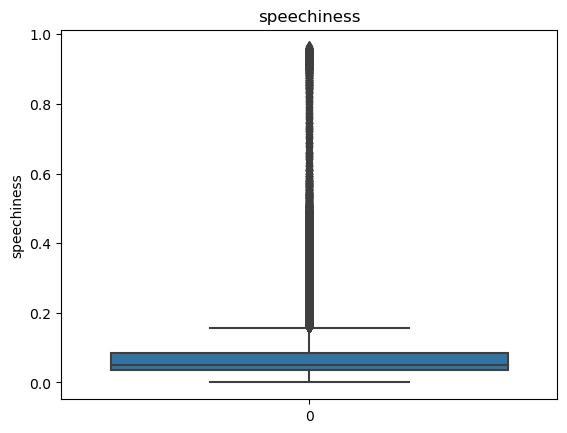

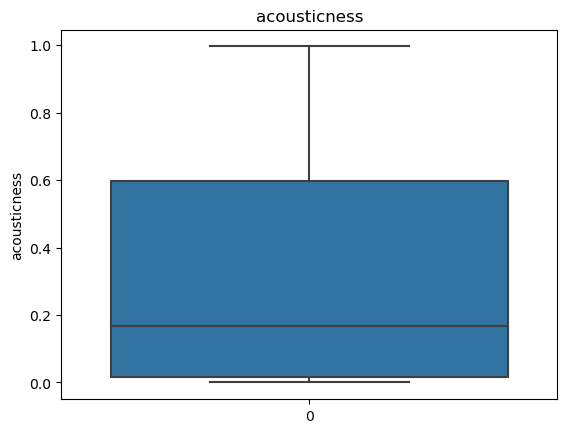

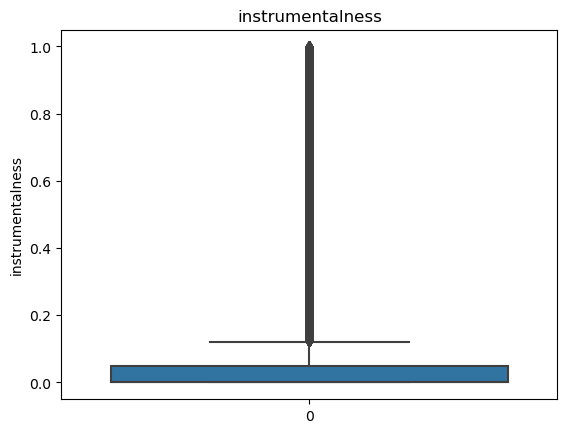

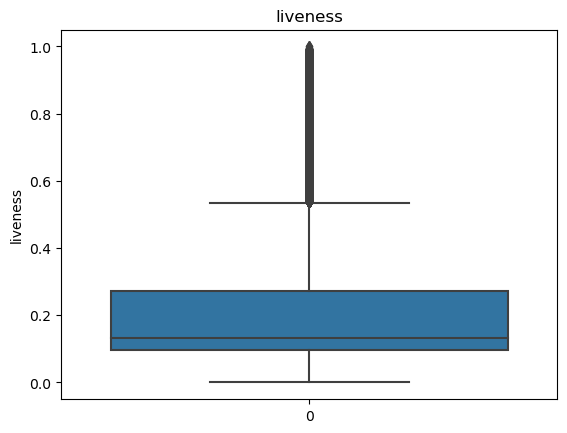

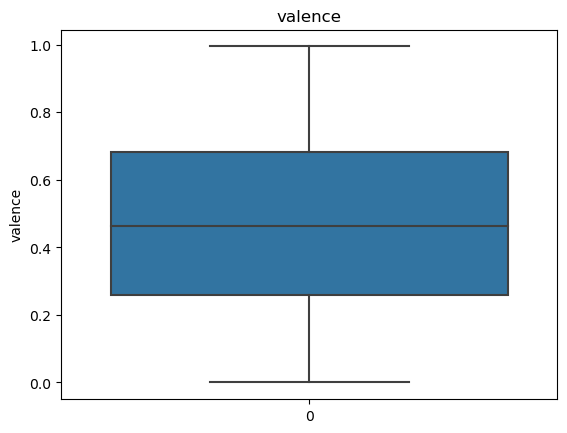

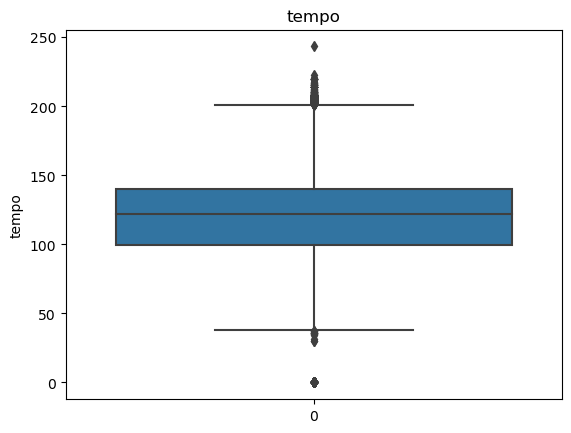

In [11]:
# checking the outliers
for feature in features_continuous_numerical:
    dataset=df.copy()
    sns.boxplot(data=dataset[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Observation:

- Apart from energy, acousticness and valence, there are a lot of outliers in most of the features.

In [12]:
feature_categorical=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical features:', len(feature_categorical))
df[feature_categorical].head()

Number of categorical features: 5


,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic


In [13]:
print(feature_categorical)

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [14]:
for feature in feature_categorical:
    dataset=df.copy()
    print(feature, ': Number of unique entries:', dataset[feature].nunique())

track_id : Number of unique entries: 89740
artists : Number of unique entries: 31437
album_name : Number of unique entries: 46589
track_name : Number of unique entries: 73608
track_genre : Number of unique entries: 114


Observation: 

- There are a lot of unique entries in each of the categorical features.
- track_id is unique for every song.

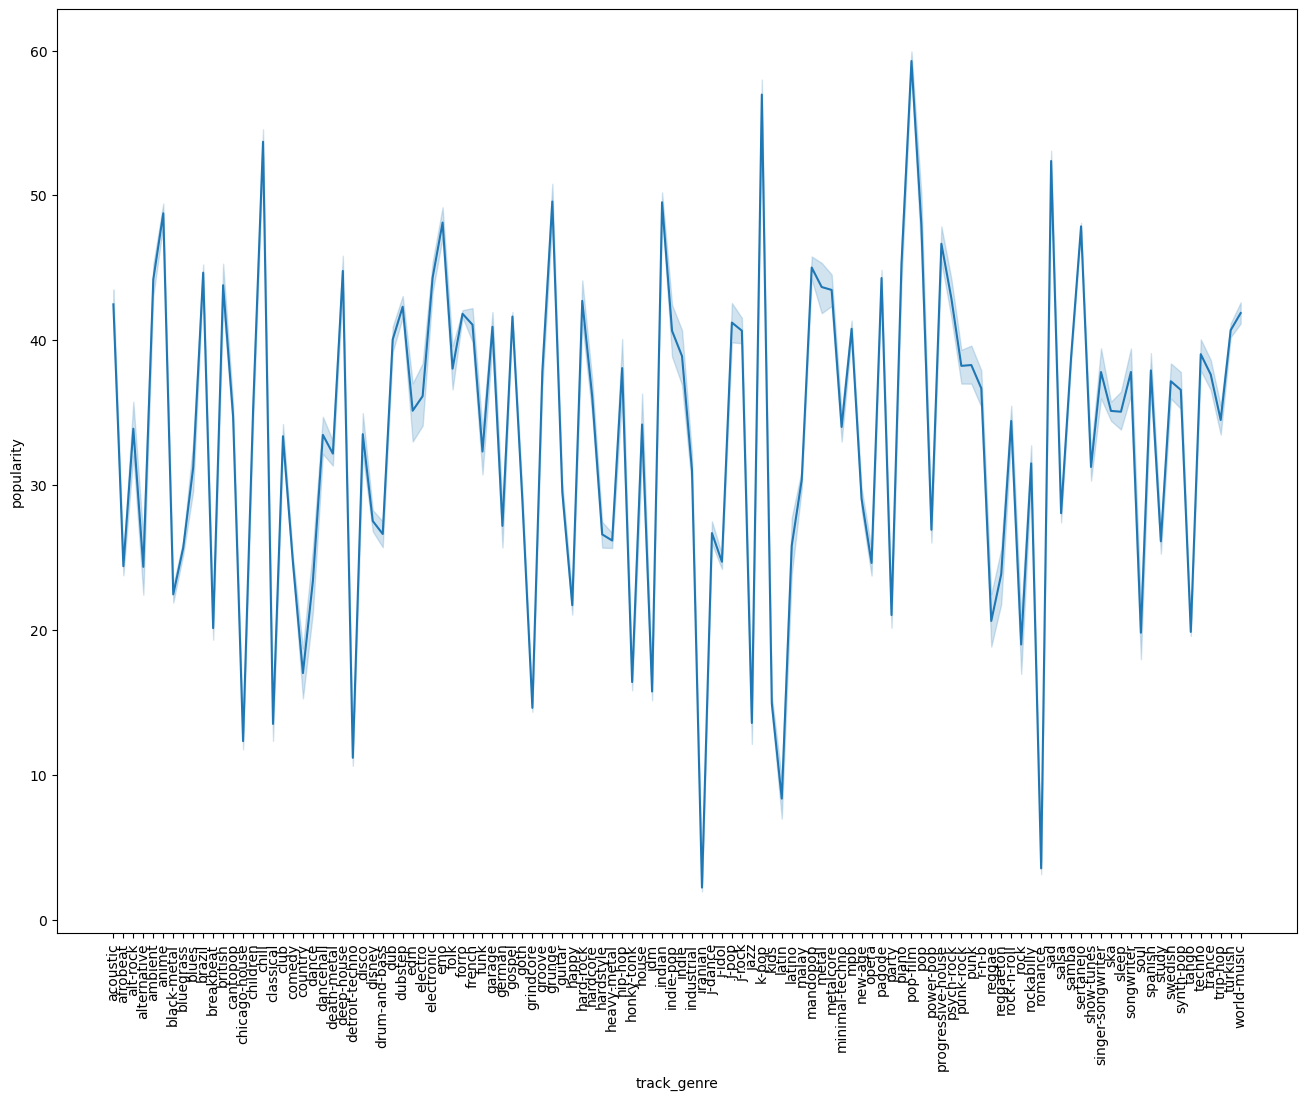

In [15]:
dataset=df.copy()
plt.figure(figsize=(16,12))
sns.lineplot(x='track_genre', y='popularity', data=dataset)
plt.xticks(rotation=90)
plt.show()